In [6]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/yasser/classes/DL26/final_Project")

import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload    

from src.utils.config import CONFIG

from src.utils.data_loader import create_loaders
from notebooks.yasser.custom_model import LaplaceConv    
from src.utils.train_model_sr import train_model_sr
import json


# CONFIG FROM YAML 
data_root      = CONFIG["paths"]["output_root"]
batch_size     = 64 #CONFIG["training"]["batch_size"]
num_workers    = CONFIG["training"]["num_workers"]
use_aug        = CONFIG["training"].get("use_augmentation", True)


# LOAD DATA 

train_loader, val_loader, test_loader = create_loaders(
    root=data_root,
    batch_size=batch_size,
    num_workers=num_workers,
    use_augmentation=use_aug
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

 DATA LOADED:
  Train: 152352 samples
  Val:   19044 samples
  Test:  19044 samples


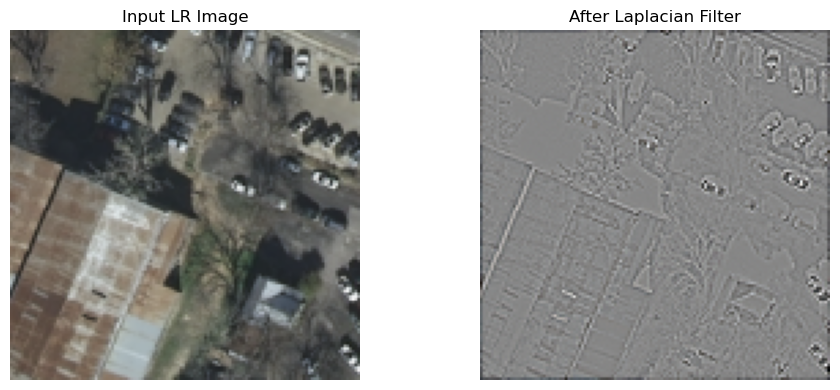

In [7]:
import torch
import matplotlib.pyplot as plt
lr, hr = next(iter(test_loader))



# Take the first image in the batch
img = hr[0].unsqueeze(0)  # shape: (1, 3, H, W)

# Move to device if needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img = img.to(device)

# Instantiate Laplacian filter
laplace = LaplaceConv(channels=3).to(device)

# Apply Laplacian filter
with torch.no_grad():
    laplacian_out = laplace(img)

# Convert tensors to numpy for plotting
img_np = img.squeeze(0).permute(1, 2, 0).cpu().numpy()
lap_np = laplacian_out.squeeze(0).permute(1, 2, 0).cpu().numpy()

# Normalize Laplacian output for visualization
lap_np = (lap_np - lap_np.min()) / (lap_np.max() - lap_np.min() + 1e-8)

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Input LR Image")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("After Laplacian Filter")
plt.imshow(lap_np)
plt.axis("off")

plt.tight_layout()
plt.show()
